In [1]:
import os
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Directorio raíz donde están las imágenes organizadas en subcarpetas
dataset_dir = r"C:\Users\jorge\UdeA\Deep Learning\CICIDS2017\CICIDS2017_imagenes"

In [4]:
# Listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

In [5]:

# Recorremos las carpetas en el directorio raíz
for etiqueta_carpeta in os.listdir(dataset_dir):
    carpeta_path = os.path.join(dataset_dir, etiqueta_carpeta)
    
    if os.path.isdir(carpeta_path):  # Verificamos si es una carpeta
        # Iterar sobre cada imagen en la subcarpeta
        for nombre_imagen in os.listdir(carpeta_path):
            imagen_path = os.path.join(carpeta_path, nombre_imagen)
            
            # Cargar la imagen usando OpenCV
            imagen = cv2.imread(imagen_path)
            
            if imagen is not None:  # Si la imagen se cargó correctamente
                
                # Guardamos la imagen y su etiqueta
                imagenes.append(imagen)
                etiquetas.append(etiqueta_carpeta)  # Usamos el nombre de la carpeta como etiqueta

In [6]:
# Convertir listas a arrays de NumPy para ser usados en ML/DL
X = np.array(imagenes)
y = np.array(etiquetas)

print(f"Dataset creado con {len(X)} imágenes y etiquetas.")

Dataset creado con 15609 imágenes y etiquetas.


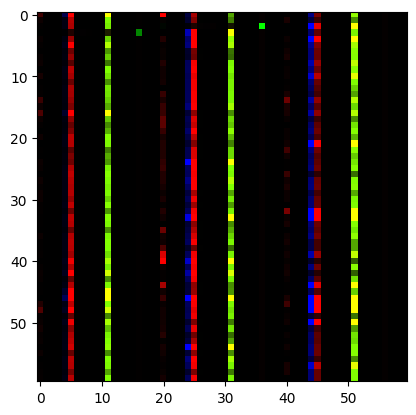

In [7]:
plt.imshow(X[-1,:,:,:])

In [8]:
np.savez(r"C:\Users\jorge\UdeA\Deep Learning\CICIDS2017\cicids2017_dataset", X=X, y=y)
print("Dataset guardado como archivo comprimido.")

Dataset guardado como archivo comprimido.


In [11]:
dataset = np.load(r"C:\Users\jorge\UdeA\Deep Learning\CICIDS2017\cicids2017_dataset.npz")

In [12]:
X = dataset['X']
y = dataset['y']

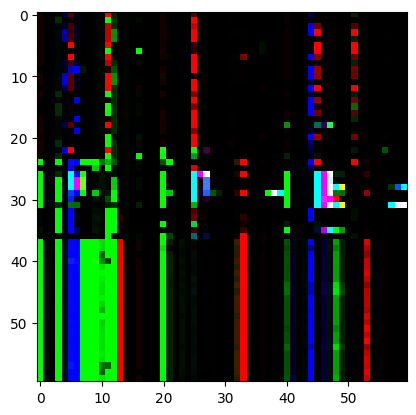

In [13]:
plt.imshow(X[0,:,:,:])

In [14]:
y = pd.DataFrame(y, columns=['label'])

In [15]:
y

,label
0,benign
1,benign
2,benign
3,benign
4,benign
...,...
15604,PortScan
15605,PortScan
15606,PortScan
15607,PortScan


In [16]:
valores= {}

In [17]:
for i in y['label'].unique():
  valores[i] =len(y[y['label'] == i])

In [18]:
valores

{'benign': 12618, 'ddos': 711, 'dos': 1398, 'PortScan': 882}